<a href="https://colab.research.google.com/github/ryoshi007/DepressionIndicator/blob/master/Depression_Indicator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries and Load the Data

In [104]:
# importing necessary libraries
from sklearn import svm
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt # for plotting data and creating different charts
import numpy as np # for math and arrays
import pandas as pd # for operation on data
import seaborn as sns # for plotting

In [105]:
data = pd.read_csv("https://raw.githubusercontent.com/ryoshi007/DepressionIndicator/master/clean_data.csv")
data

,Optimistic,Motivation,Looking-Forward,Sadness,Interest,Existential-Crisis,Importance,Enjoyment,Down-hearted,Enthusiasm,Worthiness,Hopefulness,Meaningless,Tiredness,Total_Count,gender,age,married,Age_Groups,Condition
0,1,3,0,3,3,2,0,3,3,3,2,0,1,3,27,2,16,1,Primary Children,Severe
1,1,3,1,3,2,3,1,1,2,1,1,3,1,1,24,2,16,1,Primary Children,Severe
2,3,3,3,3,3,3,3,3,0,3,3,3,3,3,39,2,17,1,Secondary Children,Extremely Severe
3,1,2,2,0,1,2,0,0,1,2,3,1,0,1,16,2,13,1,Primary Children,Moderate
4,2,3,2,3,2,3,2,1,3,2,3,2,2,2,32,2,19,1,Secondary Children,Extremely Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,2,2,3,3,2,3,3,2,2,3,3,3,3,2,36,1,16,1,Primary Children,Extremely Severe
39771,2,2,3,3,3,2,3,3,3,3,3,2,3,3,38,1,21,1,Secondary Children,Extremely Severe
39772,1,0,0,1,0,0,0,1,0,1,0,0,0,0,4,2,48,2,Elder Adults,Normal
39773,1,2,0,3,0,1,1,1,2,1,1,0,1,2,16,2,20,1,Secondary Children,Moderate


In [106]:
print(f'Number of rows/examples and columns in the dataset: {data.shape}')

Number of rows/examples and columns in the dataset: (39775, 20)


In [107]:
# Summary of information on the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39775 entries, 0 to 39774
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Optimistic          39775 non-null  int64 
 1   Motivation          39775 non-null  int64 
 2   Looking-Forward     39775 non-null  int64 
 3   Sadness             39775 non-null  int64 
 4   Interest            39775 non-null  int64 
 5   Existential-Crisis  39775 non-null  int64 
 6   Importance          39775 non-null  int64 
 7   Enjoyment           39775 non-null  int64 
 8   Down-hearted        39775 non-null  int64 
 9   Enthusiasm          39775 non-null  int64 
 10  Worthiness          39775 non-null  int64 
 11  Hopefulness         39775 non-null  int64 
 12  Meaningless         39775 non-null  int64 
 13  Tiredness           39775 non-null  int64 
 14  Total_Count         39775 non-null  int64 
 15  gender              39775 non-null  int64 
 16  age                 39

# Cleaning the Data

In [108]:
# Drop unnecesary column
data.drop("Age_Groups", inplace=True, axis=1)
data.drop("Total_Count", inplace=True, axis=1)

In [109]:
print("Display NA values in each columns: ")
data.isna().sum(axis = 0)

Display NA values in each columns: 


Optimistic            0
Motivation            0
Looking-Forward       0
Sadness               0
Interest              0
Existential-Crisis    0
Importance            0
Enjoyment             0
Down-hearted          0
Enthusiasm            0
Worthiness            0
Hopefulness           0
Meaningless           0
Tiredness             0
gender                0
age                   0
married               0
Condition             0
dtype: int64

In [110]:
print("Display NULL values in each columns: ")
data.isnull().sum()

Display NULL values in each columns: 


Optimistic            0
Motivation            0
Looking-Forward       0
Sadness               0
Interest              0
Existential-Crisis    0
Importance            0
Enjoyment             0
Down-hearted          0
Enthusiasm            0
Worthiness            0
Hopefulness           0
Meaningless           0
Tiredness             0
gender                0
age                   0
married               0
Condition             0
dtype: int64

In [111]:
data = data.dropna()

In [112]:
data = data.sample(frac = 1) # Randomly shuffle the rows to make sure data is not sorted

In [113]:
data.describe()

,Optimistic,Motivation,Looking-Forward,Sadness,Interest,Existential-Crisis,Importance,Enjoyment,Down-hearted,Enthusiasm,Worthiness,Hopefulness,Meaningless,Tiredness,gender,age,married
count,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000
mean,1.226097,1.521458,1.447316,1.784538,1.519573,1.658605,1.349591,1.437109,1.658580,1.376820,1.633991,1.373551,1.392759,1.680101,1.794595,23.612168,1.174255
std,1.038526,1.069908,1.139350,1.073779,1.110826,1.157063,1.166096,1.050809,1.066779,1.043797,1.151208,1.139862,1.187423,1.032528,0.440845,21.581722,0.456738
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,13.000000,1.000000
25%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,18.000000,1.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,21.000000,1.000000
75%,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,2.000000,25.000000,1.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1998.000000,3.000000


# Fix the Incorrect Cata

In [114]:
for (index, row) in data.iterrows():
  if (row.age >= 100):
    print(row.age)

1991
1996
115
1993
223
1998
117


In [115]:
data['age'] = data['age'].replace([1996, 1998, 1993, 223, 1991], [23, 21, 26, 23, 28])

In [116]:
data.describe()

,Optimistic,Motivation,Looking-Forward,Sadness,Interest,Existential-Crisis,Importance,Enjoyment,Down-hearted,Enthusiasm,Worthiness,Hopefulness,Meaningless,Tiredness,gender,age,married
count,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000
mean,1.226097,1.521458,1.447316,1.784538,1.519573,1.658605,1.349591,1.437109,1.658580,1.376820,1.633991,1.373551,1.392759,1.680101,1.794595,23.409026,1.174255
std,1.038526,1.069908,1.139350,1.073779,1.110826,1.157063,1.166096,1.050809,1.066779,1.043797,1.151208,1.139862,1.187423,1.032528,0.440845,8.607147,0.456738
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,13.000000,1.000000
25%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,18.000000,1.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,21.000000,1.000000
75%,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,2.000000,25.000000,1.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,117.000000,3.000000


# Embedding the Label

In [117]:
# Convert label from non-numerical value to numerical value
data = data.replace("Normal", 1)
data = data.replace("Mild", 2)
data = data.replace("Moderate", 3)
data = data.replace("Severe", 4)
data = data.replace("Extremely Severe", 5)

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39775 entries, 37889 to 2163
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Optimistic          39775 non-null  int64
 1   Motivation          39775 non-null  int64
 2   Looking-Forward     39775 non-null  int64
 3   Sadness             39775 non-null  int64
 4   Interest            39775 non-null  int64
 5   Existential-Crisis  39775 non-null  int64
 6   Importance          39775 non-null  int64
 7   Enjoyment           39775 non-null  int64
 8   Down-hearted        39775 non-null  int64
 9   Enthusiasm          39775 non-null  int64
 10  Worthiness          39775 non-null  int64
 11  Hopefulness         39775 non-null  int64
 12  Meaningless         39775 non-null  int64
 13  Tiredness           39775 non-null  int64
 14  gender              39775 non-null  int64
 15  age                 39775 non-null  int64
 16  married             39775 non-null  i

# Split the data into train / test splits

In [119]:
# Split the data into 60% train and 40% test
train_dataset, temp_test_dataset = train_test_split(data, test_size=0.4)

print(train_dataset.shape)
print(temp_test_dataset.shape)

(23865, 18)
(15910, 18)


In [120]:
# Split the temp_test_dataset dataframe to 50% test and 50% cross-validation
# Hence, the dataset is splitted into 60% train, 20% cross-validate and 20% test
test_dataset, cross_valid_dataset = train_test_split(temp_test_dataset, test_size=0.5)

print(test_dataset.shape)
print(cross_valid_dataset.shape)

(7955, 18)
(7955, 18)


In [121]:
print(f"Display the datatype of the test_dataset: {type(test_dataset)}")
print(f"Train dataset           : {train_dataset.shape}")
print(f"Cross-Validation dataset: {test_dataset.shape}")
print(f"Test dataset            : {cross_valid_dataset.shape}")

Display the datatype of the test_dataset: <class 'pandas.core.frame.DataFrame'>
Train dataset           : (23865, 18)
Cross-Validation dataset: (7955, 18)
Test dataset            : (7955, 18)


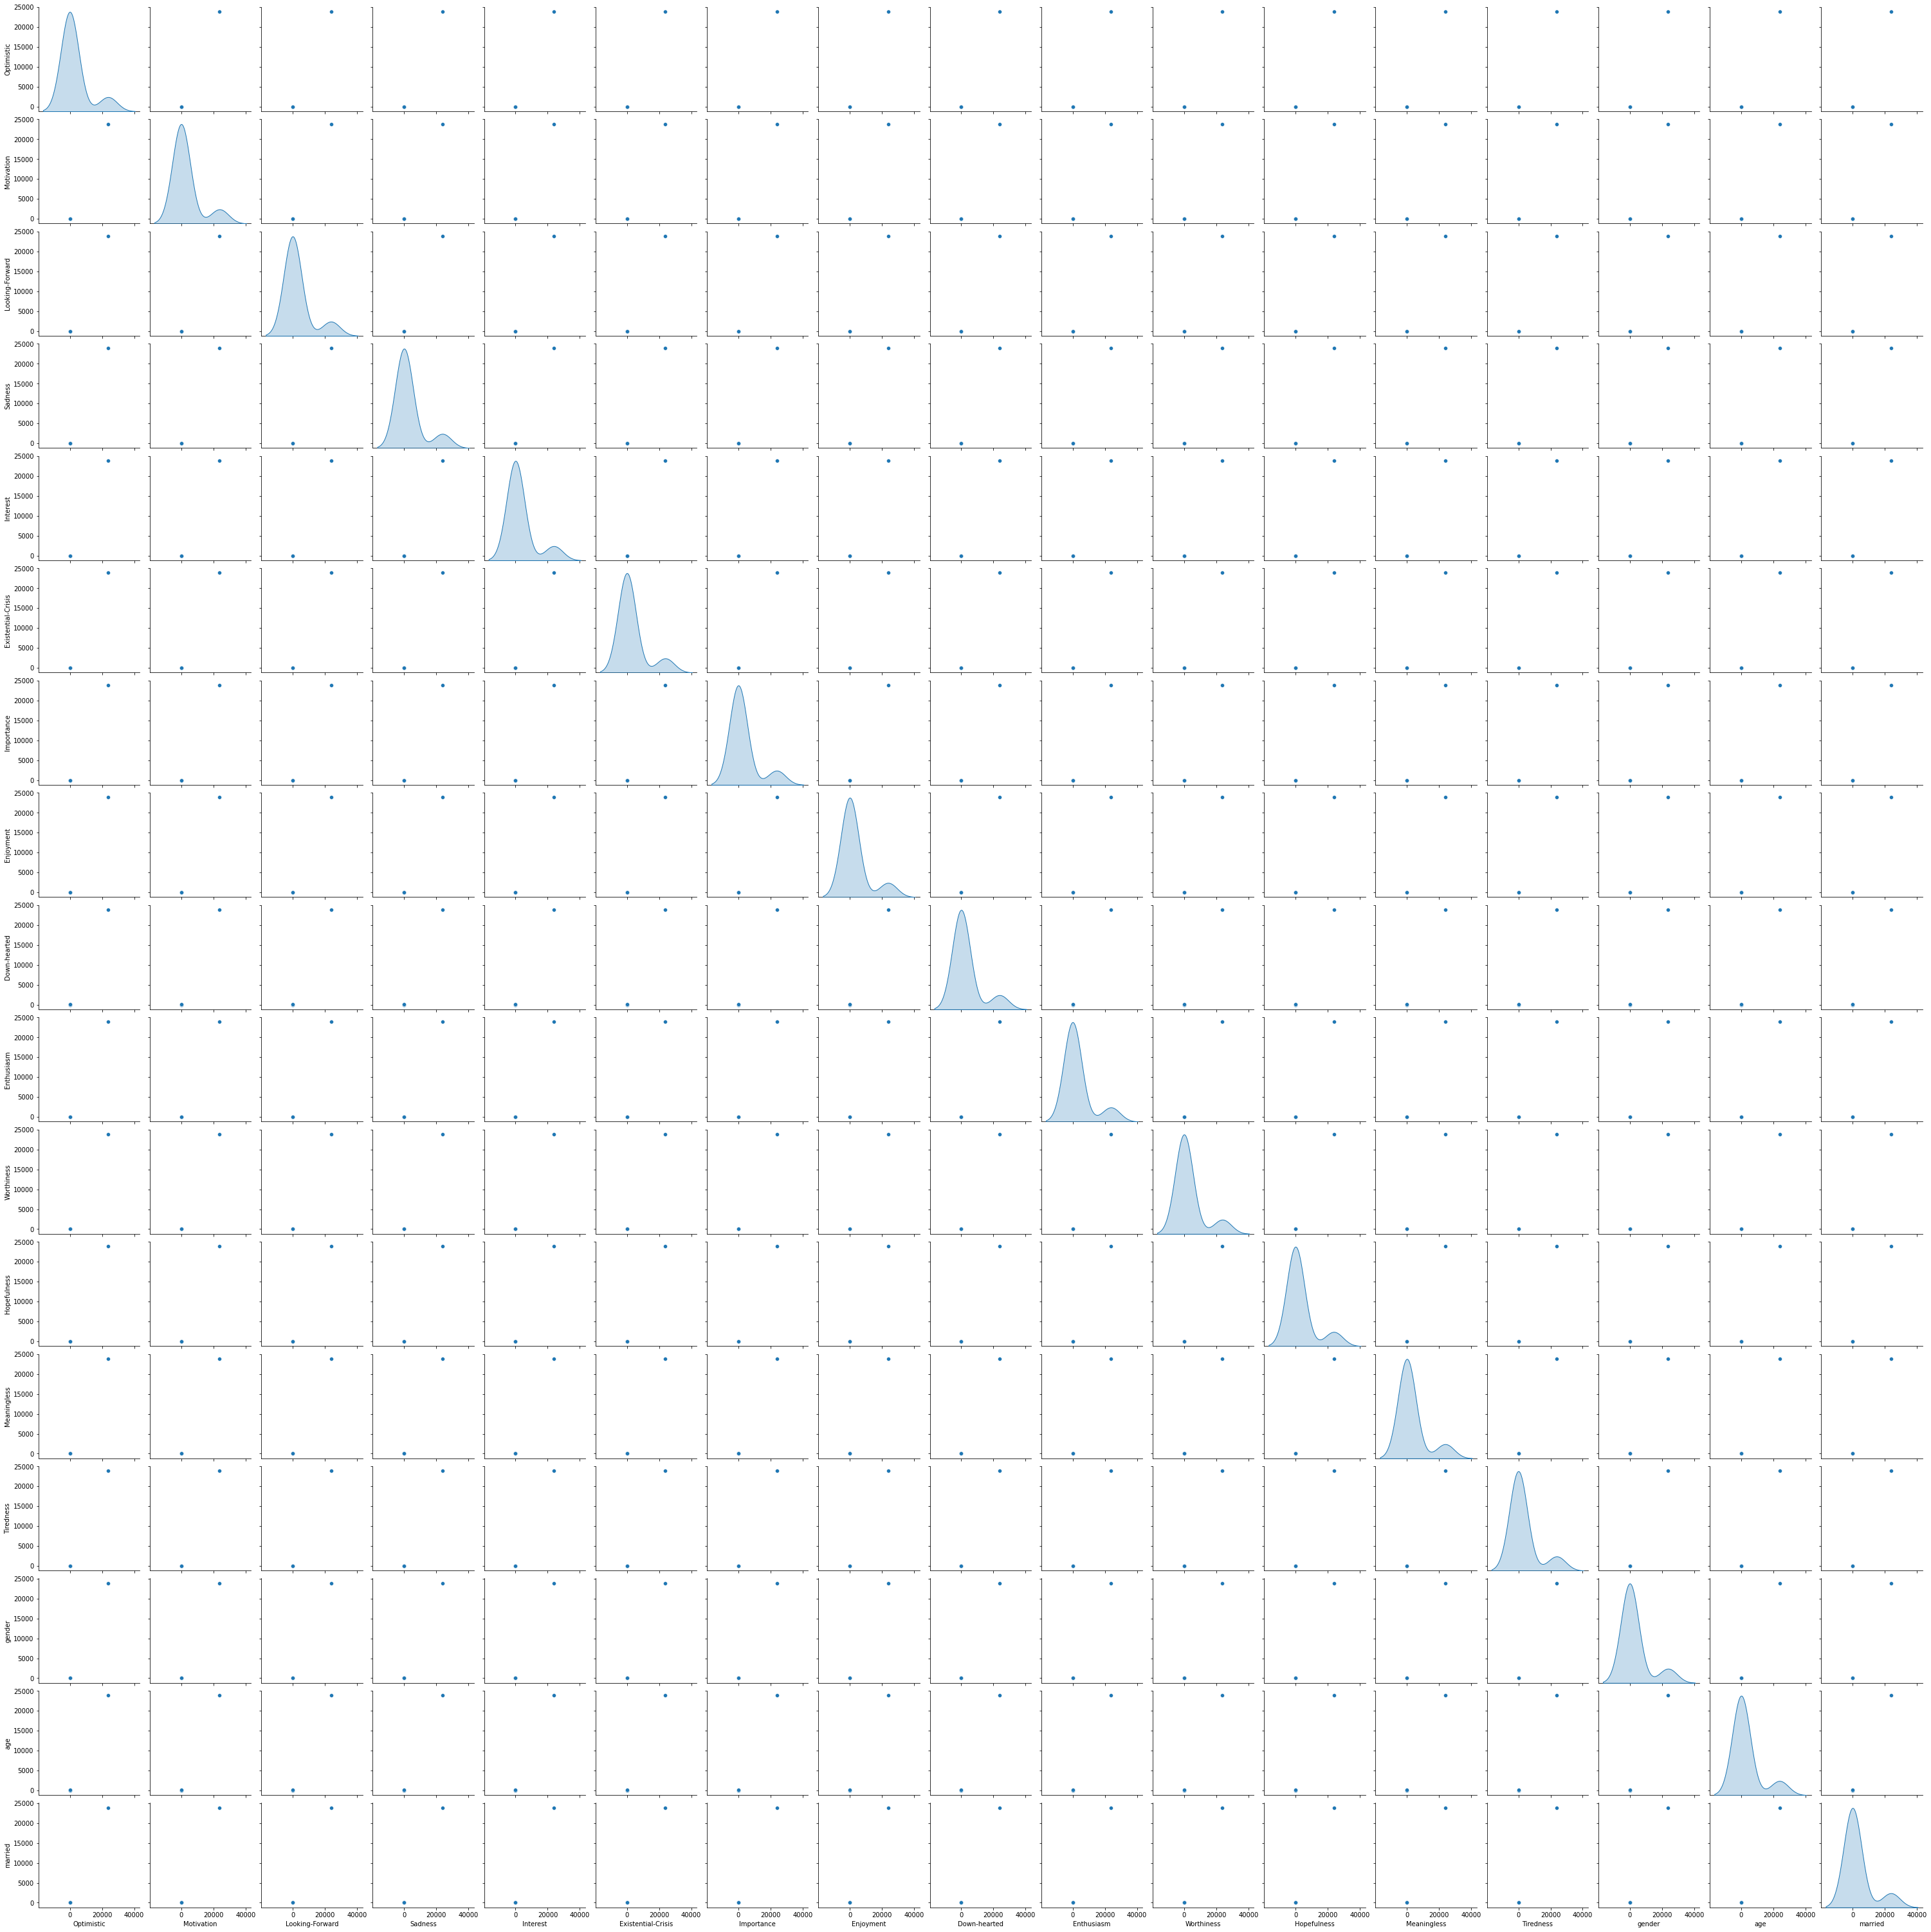

In [122]:
# Plot the relationship between each two variables to spot anything incorrect
train_stats = train_dataset.describe()
train_stats.pop("Condition")
sns.pairplot(train_stats[train_stats.columns], diag_kind="kde")

In [123]:
# Statistics on the train dataset to make sure it is in a good shape
train_stats = train_dataset.describe()
train_stats.pop("Condition")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Optimistic,23865.0,1.217683,1.034644,0.0,0.0,1.0,2.0,3.0
Motivation,23865.0,1.515776,1.067342,0.0,1.0,1.0,2.0,3.0
Looking-Forward,23865.0,1.436246,1.136569,0.0,0.0,1.0,3.0,3.0
Sadness,23865.0,1.781060,1.072174,0.0,1.0,2.0,3.0,3.0
Interest,23865.0,1.512424,1.112710,0.0,1.0,1.0,3.0,3.0
Existential-Crisis,23865.0,1.653886,1.154055,0.0,1.0,2.0,3.0,3.0
Importance,23865.0,1.342133,1.162131,0.0,0.0,1.0,2.0,3.0
Enjoyment,23865.0,1.435240,1.051159,0.0,1.0,1.0,2.0,3.0
Down-hearted,23865.0,1.652629,1.065141,0.0,1.0,2.0,3.0,3.0
Enthusiasm,23865.0,1.371423,1.043990,0.0,1.0,1.0,2.0,3.0


In [124]:
# Obtain the label
train_labels = train_dataset.pop("Condition")
test_labels = test_dataset.pop("Condition")
cross_valid_labels = cross_valid_dataset.pop("Condition")

# Data Normalization / Scaling

In [125]:
# Define a function to normalize the dataset
# Subtract the mean of the training data and divide by the standard deviaion of the training data
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_cross_valid_data = norm(cross_valid_dataset)

In [126]:
print(f"Mean - {train_stats['mean']}")
print(f"Std - {train_stats['std']}")

Mean - Optimistic             1.217683
Motivation             1.515776
Looking-Forward        1.436246
Sadness                1.781060
Interest               1.512424
Existential-Crisis     1.653886
Importance             1.342133
Enjoyment              1.435240
Down-hearted           1.652629
Enthusiasm             1.371423
Worthiness             1.624597
Hopefulness            1.367484
Meaningless            1.383742
Tiredness              1.672240
gender                 1.796313
age                   23.390991
married                1.173266
Name: mean, dtype: float64
Std - Optimistic            1.034644
Motivation            1.067342
Looking-Forward       1.136569
Sadness               1.072174
Interest              1.112710
Existential-Crisis    1.154055
Importance            1.162131
Enjoyment             1.051159
Down-hearted          1.065141
Enthusiasm            1.043990
Worthiness            1.147513
Hopefulness           1.138446
Meaningless           1.185164
Tiredness    

In [127]:
# Show a sample of the data after normalized
normed_train_data.head(10)

,Optimistic,Motivation,Looking-Forward,Sadness,Interest,Existential-Crisis,Importance,Enjoyment,Down-hearted,Enthusiasm,Worthiness,Hopefulness,Meaningless,Tiredness,gender,age,married
5479,0.756122,-0.483234,0.496014,-1.661167,0.438188,0.299911,-1.154890,-1.365388,-0.612717,-0.355772,0.327145,0.555596,-1.167553,0.317857,0.462086,-0.280153,-0.380416
10138,-0.210394,0.453673,0.496014,1.136886,1.336895,1.166421,1.426575,-0.414057,0.326127,-0.355772,1.198595,0.555596,1.363742,0.317857,0.462086,-0.514494,-0.380416
6759,-0.210394,0.453673,0.496014,-0.728483,0.438188,-0.566599,-0.294401,-0.414057,-0.612717,-0.355772,-0.544305,-0.322794,-0.323788,1.287640,0.462086,-0.397324,-0.380416
26554,1.722638,-1.420141,1.375855,1.136886,0.438188,1.166421,1.426575,1.488605,-0.612717,1.559956,1.198595,1.433986,1.363742,-1.621711,0.462086,-0.514494,-0.380416
4352,-1.176910,-1.420141,-1.263668,-1.661167,-1.359226,-1.433109,-1.154890,-0.414057,-0.612717,-1.313636,-1.415755,-1.201184,-1.167553,-1.621711,0.462086,0.305699,-0.380416
37420,-1.176910,-1.420141,-1.263668,-0.728483,-1.359226,-1.433109,-1.154890,-1.365388,-1.551560,-1.313636,-1.415755,-1.201184,-1.167553,-1.621711,-1.806519,1.243062,1.815143
184,-1.176910,-1.420141,-0.383827,-0.728483,-0.460519,-0.566599,-1.154890,-1.365388,-0.612717,-1.313636,0.327145,-1.201184,-1.167553,0.317857,-1.806519,-0.866005,1.815143
30323,-1.176910,-1.420141,-1.263668,-0.728483,-1.359226,-1.433109,-1.154890,-1.365388,-1.551560,-1.313636,-1.415755,-1.201184,-0.323788,-1.621711,0.462086,1.243062,1.815143
24253,-1.176910,-1.420141,-1.263668,-0.728483,-1.359226,0.299911,-1.154890,-0.414057,-1.551560,-0.355772,-0.544305,-0.322794,-1.167553,0.317857,-1.806519,0.071358,-0.380416
22652,-0.210394,1.390580,1.375855,1.136886,1.336895,1.166421,1.426575,1.488605,0.326127,1.559956,0.327145,0.555596,1.363742,1.287640,0.462086,-0.631665,-0.380416


# Training the Model

In [128]:
# Create a svm classifier
model = svm.SVC(C = 1, # regularization parameter
                kernel = 'rbf', #kernel{'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}, default = 'rbf'
                )

# Train the model using the training sets
model.fit(normed_train_data, train_labels)

# Predict the response for test dataset
y_pred = model.predict(normed_test_data)

In [129]:
example_batch = normed_test_data[:10]
example_result = model.predict(example_batch)
print("predicted values:")
example_result

predicted values:


array([5, 1, 5, 5, 5, 5, 2, 1, 2, 5])

# See How the Training Went

In [130]:
from sklearn import metrics
y_pred = model.predict(normed_train_data)
print("Accuracy:", metrics.accuracy_score(train_labels, y_pred))

Accuracy: 0.9997485857950974


In [131]:
y_pred = model.predict(normed_cross_valid_data)
print("Accuracy:", metrics.accuracy_score(cross_valid_labels, y_pred))

Accuracy: 0.9966059082338152


In [132]:
y_pred = model.predict(normed_test_data)
print("Accuracy:", metrics.accuracy_score(test_labels, y_pred))

Accuracy: 0.9957259585166562


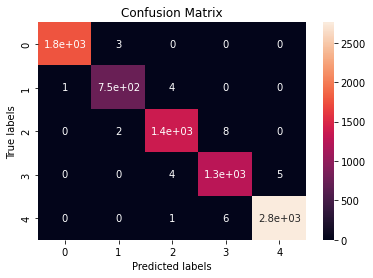

In [133]:
from sklearn.metrics import confusion_matrix

ax = plt.subplot()
predict_results = model.predict(normed_test_data)

cm = confusion_matrix(test_labels, predict_results)
sns.heatmap(cm, annot=True, ax=ax); # annot = True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
# ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Positive', 'Negative']);


# Save the Model for Later Use


In [134]:
filename = "depression_model.sav"
import pickle as pk

pk.dump(model, open(filename, 'wb'))

In [135]:
# Test for the accuracy of the saved model
loaded_model = pk.load(open(filename, 'rb'))

y_pred = loaded_model.predict(normed_train_data)
print("Accuracy:", metrics.accuracy_score(train_labels, y_pred)) 

Accuracy: 0.9997485857950974


In [136]:
y_pred = loaded_model.predict(normed_cross_valid_data)
print("Accuracy:", metrics.accuracy_score(cross_valid_labels, y_pred))

Accuracy: 0.9966059082338152


In [137]:
y_pred = loaded_model.predict(normed_test_data)
print("Accuracy:", metrics.accuracy_score(test_labels, y_pred))

Accuracy: 0.9957259585166562
